In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

import scipy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
import pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [205]:
review=pd.read_csv('data1.csv')


In [206]:
review

,review
0,It was nice produt. I like it's design a lot. ...
1,awesome sound....very pretty to see this nd th...
2,awesome sound quality. pros 7-8 hrs of battery...
3,I think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...
...,...
9971,GoodREAD MORE
9972,Everything is amazimg but the built is very li...
9973,GoodREAD MORE
9974,Best headphone i have ever used....READ MORE


In [208]:
review

,review
0,It was nice produt. I like it's design a lot. ...
1,awesome sound....very pretty to see this nd th...
2,awesome sound quality. pros 7-8 hrs of battery...
3,I think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...
...,...
9971,GoodREAD MORE
9972,Everything is amazimg but the built is very li...
9973,GoodREAD MORE
9974,Best headphone i have ever used....READ MORE


In [209]:
review.rename({'review':'x'},axis=1,inplace=True)

In [210]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       9976 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB


In [211]:
review

,x
0,It was nice produt. I like it's design a lot. ...
1,awesome sound....very pretty to see this nd th...
2,awesome sound quality. pros 7-8 hrs of battery...
3,I think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...
...,...
9971,GoodREAD MORE
9972,Everything is amazimg but the built is very li...
9973,GoodREAD MORE
9974,Best headphone i have ever used....READ MORE


In [212]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')

In [213]:
review.dtypes

x    object
dtype: object

In [214]:
import string
review = [x.strip() for x in review.x]
review = [x for x in review if x]

In [215]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(review))
sentences[5:15]


['pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output.',
 'Bass and treble are really very clear without equaliser.',
 'With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention.',
 'Really expecting other leading brands to implement this.ConsVery tight in ears.',
 'adjusters are ok .. this ll be very tight...READ MORE I think it is such a good product not only as per the quality but also the design is quite good .',
 'I m using this product from January ...',
 'In this pandamic situation it has became the most useful and helpful .',
 "Overall the bass and the sound quality is pretty good and another thing that will give you such a sigh of relief that it will provide a wire that will help you in case of lacking charges.READ MORE awesome bass sound quality very good bettary long life  and I have a purchase Rs.999  o

In [216]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df

,sentences
0,It was nice produt.
1,I like it's design a lot.
2,It's easy to carry.
3,And.
4,Looked stylish.READ MORE awesome sound....very...
...,...
5137,"Build is ok, little tight on my ear, but I am ..."
5138,(I would need to replace this headphone)2. can...
5139,charging cable is too short (~ 1...READ MORE T...
5140,The sound quality is too awesome and the bass ...


In [217]:
affinity_score=affin.set_index('word')['value'].to_dict()

In [218]:
#Custom function : score each word in a sentences in a lemmitised form,
# but calculate the score for the whole original sentence

import spacy
nlp=spacy.load("en_core_web_sm")
sentiment_lexicon =affinity_score

def calculate_sentiment (text:str = None):
    sent_score = 0
    if text:
        sentences =nlp(text)
        for word in sentences:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [219]:
# Test that it works
calculate_sentiment(text ='nice')

3

In [220]:
sent_df['sentiment_value']=sent_df['sentences'].apply(calculate_sentiment)

In [221]:
sent_df['word_count']=send_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(10)

0     4
1     6
2     4
3     1
4    30
5    14
6     9
7    33
8    11
9    32
Name: word_count, dtype: int64

In [222]:
send_df.sort_values(by='sentiment_value').tail(10)

,sentences,word_count,sentiment_value
3112,Everything is perfect 👍READ MORE Nice productR...,458,88
4940,Bass is overall good and you will enjoy listen...,391,93
3576,The battery of replace product is dying fast.R...,299,100
4693,As it costs less.READ MORE It's amazing 🤩🤩🤩REA...,453,100
4924,Just buy it fast don't waste time .😃😃😃😃😃😃READ ...,378,101
4913,Very good.READ MORE This is the awesome prodec...,215,102
4545,Rest is goodREAD MORE It's best but sometimes ...,311,105
3160,Product I love 🤩 this Thanks FlipkartREAD MORE...,319,112
3384,You will feel the real happiness when you get ...,434,126
5135,THE product is too good And i am enjoying the ...,420,130


In [223]:
# sentiment score of the whole tweets
sent_df['sentiment_value'].describe()


count    5142.000000
mean        7.350836
std        12.398140
min        -7.000000
25%         0.000000
50%         3.000000
75%         9.000000
max       130.000000
Name: sentiment_value, dtype: float64

In [224]:
# sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentences,sentiment_value,word_count
3,And.,0,1
5,pros 7-8 hrs of battery life (including 45 min...,0,14
8,Really expecting other leading brands to imple...,0,11
10,I m using this product from January ...,0,8
16,Sound quality and build quality is awesome2.,0,7


In [225]:
sent_df[sent_df['sentiment_value']>100].head()

,sentences,sentiment_value,word_count
3158,Product I love 🤩 this Thanks FlipkartREAD MORE...,112,1
3382,You will feel the real happiness when you get ...,126,166
4543,Rest is goodREAD MORE It's best but sometimes ...,105,9
4911,Very good.READ MORE This is the awesome prodec...,102,63
4922,Just buy it fast don't waste time .😃😃😃😃😃😃READ ...,101,7


In [226]:
sent_df['index']=range(0,len(sent_df))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

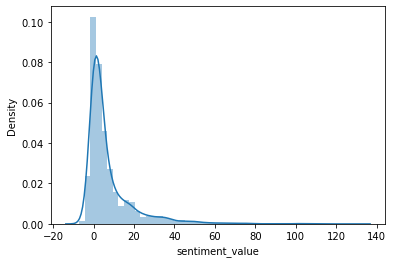

In [227]:
sns.distplot(sent_df['sentiment_value'],kde=True)

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

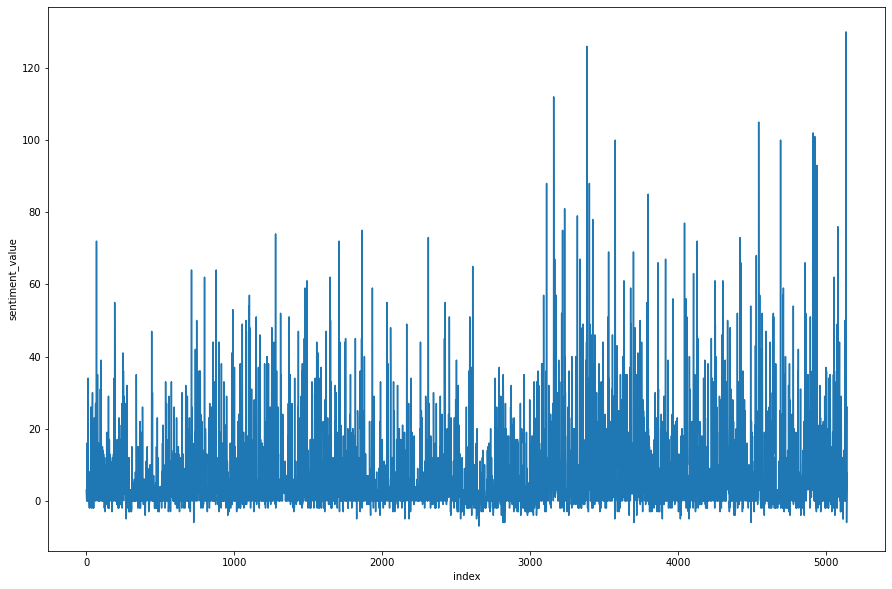

In [228]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

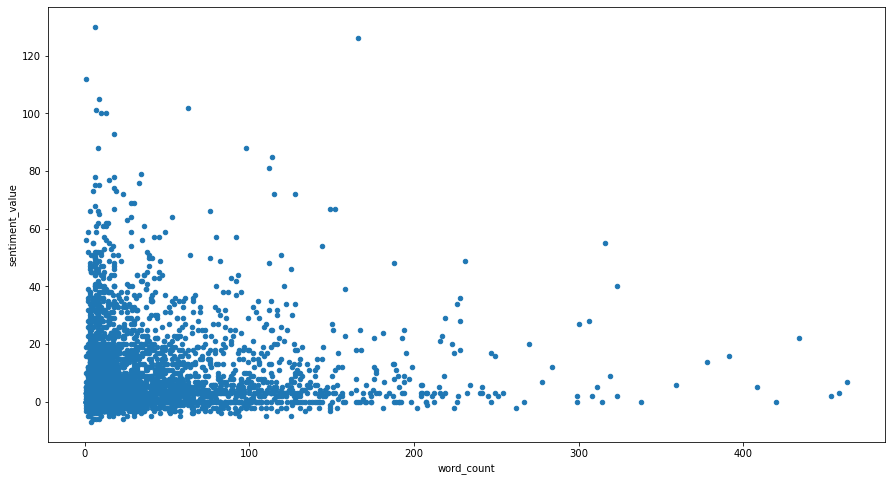

In [229]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(15,8))